In [1]:
from langgraph.graph import StateGraph,START , END
from typing import TypedDict
from langchain_groq import ChatGroq
from langgraph.checkpoint.memory import InMemorySaver

In [2]:
llm = ChatGroq(model="llama-3.1-8b-instant", temperature=0.2)

In [15]:
class JokeState(TypedDict):
    prompt: str
    joke: str
    explanation: str

In [ ]:

def make_joke(state: JokeState):
    prompt  = state['prompt']
    joke = llm.invoke(f"Tell me a joke about {prompt}").content
    
    return {'joke': joke}

In [16]:
def explain_joke(state: JokeState):
    joke = state['joke']
    explanation = llm.invoke(f"Explain the following joke: {joke}").content
    return {'explanation': explanation}

In [21]:
graph = StateGraph(JokeState)
checkpoint = InMemorySaver()

graph.add_node('make_joke', make_joke)
graph.add_node('explain_joke', explain_joke)

graph.add_edge(START, 'make_joke')
graph.add_edge('make_joke', 'explain_joke')
graph.add_edge('explain_joke', END)

chatbot = graph.compile(checkpointer=checkpoint)

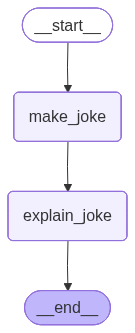

In [18]:
chatbot

In [22]:
config1 = {'configurable': {'thread_id':'1'}}
internal_state = {
    'prompt': 'dogs'
}
chatbot.invoke(internal_state, config=config1)

{'prompt': 'dogs',
 'joke': 'Why did the dog go to the vet?\n\nBecause he was feeling a little ruff.',
 'explanation': 'This joke is a play on words. The phrase "feeling a little ruff" has a double meaning here. \n\nIn one sense, "ruff" can be a colloquialism for "rough" or "unwell," implying that the dog is not feeling well. However, "ruff" can also refer to the sound a dog makes, such as "ruff-ruff," which is a common way dogs bark.\n\nThe joke relies on this wordplay to create a pun, making a connection between the dog\'s health and its characteristic sound. The punchline is a clever and humorous way to explain why the dog went to the vet, using a pun to create a lighthearted and amusing effect.'}

In [23]:
chatbot.get_state(config=config1)

StateSnapshot(values={'prompt': 'dogs', 'joke': 'Why did the dog go to the vet?\n\nBecause he was feeling a little ruff.', 'explanation': 'This joke is a play on words. The phrase "feeling a little ruff" has a double meaning here. \n\nIn one sense, "ruff" can be a colloquialism for "rough" or "unwell," implying that the dog is not feeling well. However, "ruff" can also refer to the sound a dog makes, such as "ruff-ruff," which is a common way dogs bark.\n\nThe joke relies on this wordplay to create a pun, making a connection between the dog\'s health and its characteristic sound. The punchline is a clever and humorous way to explain why the dog went to the vet, using a pun to create a lighthearted and amusing effect.'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0cb966-a01e-6410-8002-4dba4e10506c'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2025-11-27T13:38:53.252712+00:00', parent_config={'configurable': {'thr

In [25]:
list(chatbot.get_state_history(config=config1))

[StateSnapshot(values={'prompt': 'dogs', 'joke': 'Why did the dog go to the vet?\n\nBecause he was feeling a little ruff.', 'explanation': 'This joke is a play on words. The phrase "feeling a little ruff" has a double meaning here. \n\nIn one sense, "ruff" can be a colloquialism for "rough" or "unwell," implying that the dog is not feeling well. However, "ruff" can also refer to the sound a dog makes, such as "ruff-ruff," which is a common way dogs bark.\n\nThe joke relies on this wordplay to create a pun, making a connection between the dog\'s health and its characteristic sound. The punchline is a clever and humorous way to explain why the dog went to the vet, using a pun to create a lighthearted and amusing effect.'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0cb966-a01e-6410-8002-4dba4e10506c'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2025-11-27T13:38:53.252712+00:00', parent_config={'configurable': {'th